# 利用遊戲王卡片資料進行分析

## 1. 寫入檔案

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
filepath = 'C:\\Users\\pc\\Desktop\\Python_Lab\\yugioh_final.csv'
df = pd.read_csv(filepath,encoding = 'cp1252')
df.head()

,Check,Card #,Card Name,Type,Rarity,Value,Attribute,Sub Type,Level,ATK,DEF,Card Text,Unnamed: 12
0,NaN,LOB-000,Tri-Horned Dragon,Normal Monster,Secret Rare,NaN,Dark,Dragon,8,2850,2350,An unworthy dragon with three sharp horns spro...,NaN
1,NaN,LOB-001,Blue-Eyes White Dragon,Normal Monster,Ultra Rare,NaN,Light,Dragon,8,3000,2500,This legendary dragon is a powerful engine of ...,NaN
2,NaN,LOB-002,Hitotsu-Me Giant,Normal Monster,Common,NaN,Earth,Beast-Warrior,4,1200,1000,"A one-eyed behemoth with thick, powerful arms ...",NaN
3,NaN,LOB-003,Flame Swordsman,Fusion Monster,Super Rare,NaN,Fire,Warrior,5,1800,1600,"""Flame Manipulator"" + ""Masaki the Legendary Sw...",NaN
4,NaN,LOB-004,Skull Servant,Normal Monster,Common,NaN,Dark,Zombie,1,300,200,A skeletal ghost that isn't strong but can be ...,NaN


In [3]:
df.loc[0]

Check                                                        NaN
Card #                                                   LOB-000
Card Name                                      Tri-Horned Dragon
Type                                              Normal Monster
Rarity                                               Secret Rare
Value                                                        NaN
Attribute                                                   Dark
Sub Type                                                  Dragon
Level                                                          8
ATK                                                         2850
DEF                                                         2350
Card Text      An unworthy dragon with three sharp horns spro...
Unnamed: 12                                                  NaN
Name: 0, dtype: object

In [4]:
len(df)

3559

## 2. 處理missing data

### drop 無意義資料

In [5]:
#利用 "thresh" 的功能，若 col 中 nan 大於 30% of data 則 drop

df1 = df.dropna(thresh=(len(df)*30/100), axis=1)
df1.head(100)


,Card #,Card Name,Type,Rarity,Attribute,Sub Type,Level,ATK,DEF,Card Text
0,LOB-000,Tri-Horned Dragon,Normal Monster,Secret Rare,Dark,Dragon,8,2850,2350,An unworthy dragon with three sharp horns spro...
1,LOB-001,Blue-Eyes White Dragon,Normal Monster,Ultra Rare,Light,Dragon,8,3000,2500,This legendary dragon is a powerful engine of ...
2,LOB-002,Hitotsu-Me Giant,Normal Monster,Common,Earth,Beast-Warrior,4,1200,1000,"A one-eyed behemoth with thick, powerful arms ..."
3,LOB-003,Flame Swordsman,Fusion Monster,Super Rare,Fire,Warrior,5,1800,1600,"""Flame Manipulator"" + ""Masaki the Legendary Sw..."
4,LOB-004,Skull Servant,Normal Monster,Common,Dark,Zombie,1,300,200,A skeletal ghost that isn't strong but can be ...
5,LOB-005,Dark Magician,Normal Monster,Ultra Rare,Dark,Spellcaster,7,2500,2100,The ultimate wizard in the terms of attack and...
6,LOB-006,Gaia the Fierce Knight,Normal Monster,Ultra Rare,Earth,Warrior,7,2300,2100,A knight whose horse travels faster than the w...
7,LOB-007,Celtic Guardian,Normal Monster,Super Rare,Earth,Warrior,4,1400,1200,An elf who learned to wield a sword. He baffle...
8,LOB-008,Basic Insect,Normal Monster,Common,Earth,Insect,2,500,700,"Usually found traveling in swarms, this creatu..."
9,LOB-009,Mammoth Graveyard,Normal Monster,Common,Earth,Dinosaur,3,1200,800,A mammoth that protects the graves of its pack...


In [6]:
# 若 row 中 "Type" 為 NAN 為珍藏卡 or 禁卡，為無效資料 

df_exixted = df1[df1.isnull().sum(axis=1) < 7]
df_exixted.head(100)

,Card #,Card Name,Type,Rarity,Attribute,Sub Type,Level,ATK,DEF,Card Text
0,LOB-000,Tri-Horned Dragon,Normal Monster,Secret Rare,Dark,Dragon,8,2850,2350,An unworthy dragon with three sharp horns spro...
1,LOB-001,Blue-Eyes White Dragon,Normal Monster,Ultra Rare,Light,Dragon,8,3000,2500,This legendary dragon is a powerful engine of ...
2,LOB-002,Hitotsu-Me Giant,Normal Monster,Common,Earth,Beast-Warrior,4,1200,1000,"A one-eyed behemoth with thick, powerful arms ..."
3,LOB-003,Flame Swordsman,Fusion Monster,Super Rare,Fire,Warrior,5,1800,1600,"""Flame Manipulator"" + ""Masaki the Legendary Sw..."
4,LOB-004,Skull Servant,Normal Monster,Common,Dark,Zombie,1,300,200,A skeletal ghost that isn't strong but can be ...
5,LOB-005,Dark Magician,Normal Monster,Ultra Rare,Dark,Spellcaster,7,2500,2100,The ultimate wizard in the terms of attack and...
6,LOB-006,Gaia the Fierce Knight,Normal Monster,Ultra Rare,Earth,Warrior,7,2300,2100,A knight whose horse travels faster than the w...
7,LOB-007,Celtic Guardian,Normal Monster,Super Rare,Earth,Warrior,4,1400,1200,An elf who learned to wield a sword. He baffle...
8,LOB-008,Basic Insect,Normal Monster,Common,Earth,Insect,2,500,700,"Usually found traveling in swarms, this creatu..."
9,LOB-009,Mammoth Graveyard,Normal Monster,Common,Earth,Dinosaur,3,1200,800,A mammoth that protects the graves of its pack...


### 分類卡片為「怪獸」、「魔法」、「陷阱」

In [7]:
monster = df_exixted[(df_exixted.Type != "Spell") & (df_exixted.Type != "Trap")]
spell = df_exixted[(df_exixted.Type == "Spell")]
trap = df_exixted[(df_exixted.Type != "Trap")] 

##  "monster" unclean 
mon = monster.replace('?',0.0)
mon = mon.replace("  ",0.0)
mon = mon.replace('-1', 0.0)
mon.ATK = pd.to_numeric(mon.ATK)
mon.DEF = pd.to_numeric(mon.DEF)
mon.Level = pd.to_numeric(mon.Level)
mon = mon.sort_values(by = "Level", ascending= 1)        ##有效的怪獸必有星等
mon = mon[140:-5]
mon


,Card #,Card Name,Type,Rarity,Attribute,Sub Type,Level,ATK,DEF,Card Text
792,PGD-107,Lava Golem,Effect Monster,Secret Rare,Fire,Fiend,1.0,3000.0,2500.0,This card must be Special Summoned on your opp...
2617,CRMS-EN032,Scanner,Effect Monster,Super Rare,Light,Machine,1.0,0.0,0.0,"Once per turn, you can select 1 of your oppone..."
2624,CRMS-EN039,Alien Ammonite,Tuner Monster,Rare,Light,Reptile,1.0,500.0,200.0,"When this card is Normal Summoned, you can Spe..."
2802,ANPR-EN005,Blackwing - Vayu the Emblem of Honor,Tuner Monster,Ultra Rare,Dark,Winged Beast,1.0,800.0,0.0,"IF this card is face-up on the field, you cann..."
759,PGD-074,Charm of Shabti,Effect Monster,Common,Dark,Rock,1.0,100.0,100.0,Discard this card from your hand to the Gravey...
2697,RGBT-EN009,Evil Thorn,Effect Monster,Common,Dark,Plant,1.0,100.0,300.0,You can Tribute this card to inflict 300 damag...
3034,ABPF-EN001,Unicycular,Normal Monster,Common,Earth,Machine,1.0,100.0,100.0,"The third of the brothers, following Tricular ..."
3050,ABPF-EN017,Reptilianne Naga,Effect Monster,Common,Dark,Reptile,1.0,0.0,0.0,This card cannot be destroyed by battle. The A...
286,MRL-016,Griggle,Effect Monster,Common,Earth,Plant,1.0,350.0,300.0,When this card is face-up on the Field and con...
1024,IOC-017,Chaos Necromancer,Effect Monster,Normal,Dark,Fiend,1.0,0.0,0.0,The ATK of this card becomes the number of Mo...


## 3. 利用怪獸卡攻擊力、守備力進行數據分析，以及加入星等的分類

### ATK, DEF 分析

In [8]:
#攻擊力降冪排列
mon_ATK = mon.sort_values(by = "ATK", ascending=0)
mon_ATK.dropna(inplace=1)
mon_ATK.index = range(1,2098)
mon_ATK.describe()

,Level,ATK,DEF
count,2097.000000,2097.000000,2097.000000
mean,4.238913,1389.365761,1134.741536
std,2.032806,845.422581,732.116196
min,1.000000,0.000000,0.000000
25%,3.000000,800.000000,500.000000
50%,4.000000,1400.000000,1200.000000
75%,5.000000,1900.000000,1600.000000
max,12.000000,4500.000000,4000.000000


### 攻擊力是否與守備力有關?

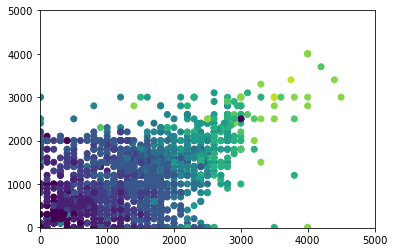

In [9]:
x = mon_ATK.ATK 
y = mon_ATK.DEF
z = mon_ATK.Level

plt.xlim(-10,5000)
plt.ylim(-10,5000)
plt.scatter(x, y, c=z)

         看出星等與攻擊力, 防禦力成些微正相關

### 想知道下一張出版的卡攻擊守備關係  by 不太準確的linear regression

In [10]:
### 導入模組
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

regr = LinearRegression()

In [11]:
X = x.reshape(len(x), 1)
Y = y.reshape(len(y), 1)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  from ipykernel import kernelapp as app


In [12]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 100)

In [13]:
## start training
regr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [14]:
regr.intercept_

array([ 466.27754251])

In [15]:
regr.coef_

array([[ 0.48640804]])

In [16]:
Y_pred = regr.predict(x_test)

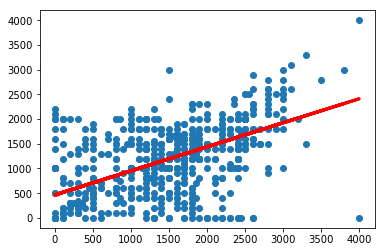

In [17]:
plt.scatter(x_test, y_test)
plt.plot(x_test, Y_pred, 'r', lw=3)

In [18]:
## if 下隻攻擊力3000 守備力有可能為1925左右

regr.predict(3000)

array([[ 1925.50165105]])